In [1]:
!python --version

Python 3.11.7


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sp
import scipy.spatial.distance as sp_dist
import seaborn as sns

In [3]:
sku = pd.read_csv("DATA_2.01_SKU.csv")
hr = pd.read_csv("DATA_2.02_HR.csv")
tele = pd.read_csv("DATA_2.03_Telco.csv")

In [4]:
sku.describe()

,ADS,CV
count,100.000000,100.000000
mean,5.610000,0.396000
std,4.211324,0.237317
min,1.000000,0.050000
25%,2.000000,0.130000
50%,3.000000,0.400000
75%,10.000000,0.590000
max,14.000000,0.960000


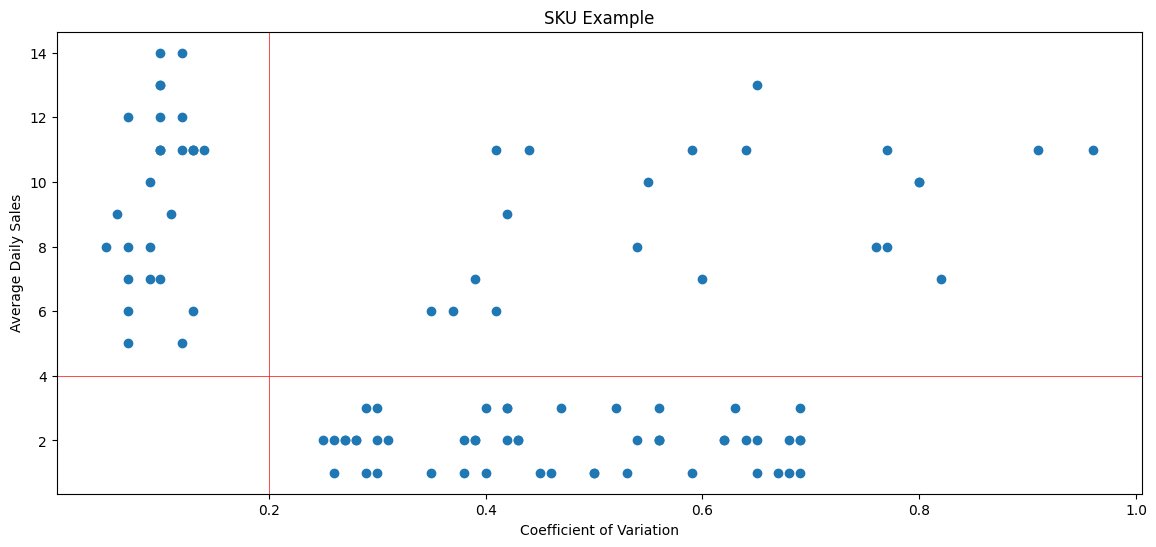

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter("CV", "ADS", data=sku)
ax.axvline(0.2, color="red", linewidth="0.5")
ax.axhline(4, color="red", linewidth="0.5")

plt.title("SKU Example")
plt.xlabel("Coefficient of Variation")
plt.ylabel("Average Daily Sales")
plt.show()

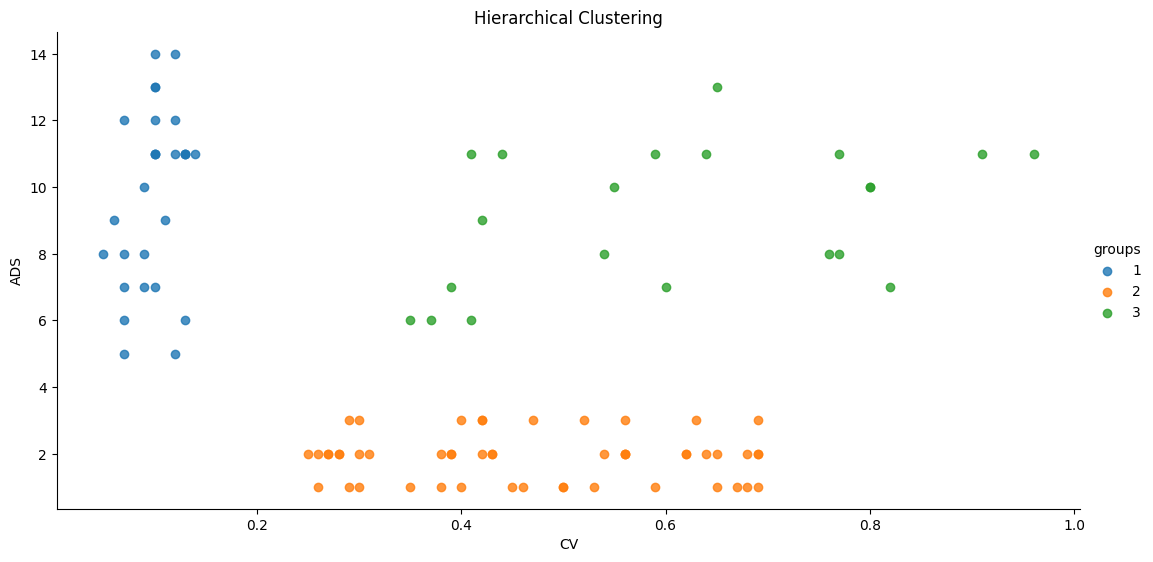

In [19]:
sku_copy = sku.copy()
sku_copy = (sku_copy - sku_copy.mean()) / sku_copy.std()

dist = sp.distance.pdist(sku_copy, metric="euclidean")
linkage_matrix = sp.linkage(dist, metric='ward')
sku["groups"] = sp.fcluster(linkage_matrix, 3, criterion='maxclust')

sns.lmplot(x='CV', y='ADS', data=sku, hue='groups', fit_reg=False, height=5.5, aspect=2)
plt.title('Hierarchical Clustering')
plt.show()

In [7]:
hr.describe()

,S,LPE,NP,ANH,TIC,Newborn
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.439955,0.721015,3.87700,207.914000,3.878000,0.052500
std,0.264734,0.197464,1.81756,61.331904,0.973442,0.223089
min,0.090000,0.450000,2.00000,126.000000,2.000000,0.000000
25%,0.110000,0.520000,2.00000,146.000000,3.000000,0.000000
50%,0.410000,0.790000,4.00000,225.000000,4.000000,0.000000
75%,0.730000,0.900000,6.00000,262.000000,5.000000,0.000000
max,0.920000,1.000000,7.00000,310.000000,6.000000,1.000000


In [8]:
tele.describe()

,Calls,Intern,Text,Data,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.629930,0.404840,225.021570,1.964750,37.776000
std,1.516563,0.377571,213.821509,1.374458,16.195311
min,0.850000,0.090000,17.010000,0.170000,12.000000
25%,1.490000,0.110000,20.770000,0.520000,24.000000
50%,2.040000,0.220000,190.525000,1.980000,35.000000
75%,3.492500,0.790000,449.437500,2.902500,51.000000
max,6.000000,1.200000,598.940000,4.790000,72.000000
